In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.utils.data as Data  
import matplotlib.pyplot as plt

# Load the input tensor we saved in earlier practice

In [3]:
train_x = torch.load('C:/Users/ADMIN/Desktop/train_x.tensor')  
train_y = torch.load('C:/Users/ADMIN/Desktop/train_y.tensor')  

In [4]:
train_x.shape

torch.Size([25000, 80, 80, 3])

In [5]:
train_y.shape

torch.Size([25000, 1])

# Reshape train_y from 25000x1 to 25000

In [6]:
train_y = train_y.view(25000)

In [7]:
train_y.shape

torch.Size([25000])

# Build training tensor data set and data loader

In [8]:
train_x = train_x.type(torch.FloatTensor)

In [9]:
train_y = train_y.type(torch.LongTensor)

In [10]:
torch_dataset = Data.TensorDataset(data_tensor=train_x, target_tensor=train_y)

In [11]:
loader = Data.DataLoader(
    dataset=torch_dataset,     # torch TensorDataset format
    batch_size=5000,           # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)

# Define NN

In [12]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=240,
            hidden_size=64,         # rnn hidden unit
            num_layers=1,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(64, 2)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [13]:
rnn = RNN()

In [14]:
rnn

RNN(
  (rnn): LSTM(240, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=2, bias=True)
)

# Run one training epoc step by step to understand details

In [18]:
for step, (x, y) in enumerate(loader):
    break

In [19]:
print(step, x.shape, y.shape)

0 torch.Size([5000, 80, 80, 3]) torch.Size([5000])


In [20]:
b_x = Variable(x.view(-1, 80, 80*3))            # reshape x to (batch, time_step, input_size)
b_y = Variable(y)       
print(b_x.shape, b_y.shape)

torch.Size([5000, 80, 240]) torch.Size([5000])


In [21]:
output = rnn(b_x) 

In [22]:
output.shape

torch.Size([5000, 2])

In [23]:
loss = loss_func(output, b_y) 

In [25]:
loss

Variable containing:
 0.7128
[torch.FloatTensor of size 1]

In [26]:
loss.data.numpy()[0]

0.71275574

# Training loop

In [27]:
losslst = []
for epoch in range(1):  #run only one epoc
    for step, (x, y) in enumerate(loader):        # gives batch data
        b_x = Variable(x.view(-1, 80, 80*3))            # reshape x to (batch, time_step, input_size)
        b_y = Variable(y)                               # batch y

        output = rnn(b_x)                               # rnn output
        loss = loss_func(output, b_y)                   # cross entropy loss
        
        print('Epoch: ', epoch, '| step: ', step, '| train loss: ', loss.data[0])
        losslst.append(loss.data[0])
        
        optimizer.zero_grad()                           # clear gradients for this training step
        loss.backward()                                 # backpropagation, compute gradients
        optimizer.step()                                # apply gradients

Epoch:  0 | step:  0 | train loss:  0.7143781185150146
Epoch:  0 | step:  1 | train loss:  0.7225417494773865
Epoch:  0 | step:  2 | train loss:  0.7238177061080933
Epoch:  0 | step:  3 | train loss:  0.7014833688735962
Epoch:  0 | step:  4 | train loss:  0.6940373778343201


# Visualize loss plot

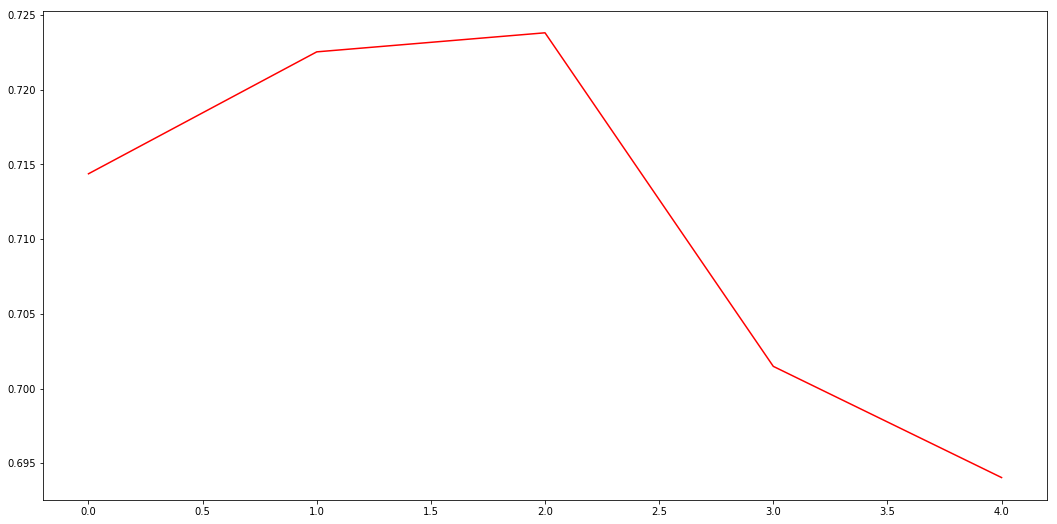

In [28]:
plt.figure(figsize=(18,9)) # set the figure size to 18 x 9 inches
plt.plot(losslst, color = 'red')
plt.show()